<a href="https://colab.research.google.com/github/Akhil-Sharma30/House-Pricing-Analysis/blob/main/house_prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Prices - Advanced Regression Techniques**


## **Goal**
    It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.
and **evaluation** with RMSE

Data fields
Here's a brief version of what you'll find in the data description file.
<details>



    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    

    MSSubClass: The building class

    MSZoning: The general zoning classification

    LotFrontage: Linear feet of street connected to property

    LotArea: Lot size in square feet

    Street: Type of road access

    Alley: Type of alley access

    LotShape: General shape of property

    LandContour: Flatness of the property

    Utilities: Type of utilities available

    LotConfig: Lot configuration

    LandSlope: Slope of property

    Neighborhood: Physical locations within Ames city limits

    Condition1: Proximity to main road or railroad

    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

</details>

In [1]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.metrics import recall_score,precision_score,f1_score,classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer,SimpleImputer
import math
from math import remainder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


## Reading the data

In [2]:
# Mounting the drive for reading the .csv files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading data as its splitted i will read it in  Train and test

path1= '/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv'
path2= '/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv'

df= pd.read_csv(path1)

test=pd.read_csv(path2)


df.shape

(1460, 81)

In [4]:
Data_to_classify_as_OHE=['MSZoning','Street','LotShape','Utilities','LotConfig','Condition1','Condition2','BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','CentralAir','Electrical','GarageType','Functional','GarageFinish']
pd.get_dummies(df,columns=Data_to_classify_as_OHE)
#len(Data_to_classify_as_OHE)

,Id,MSSubClass,LotFrontage,LotArea,Alley,LandContour,LandSlope,Neighborhood,HouseStyle,OverallQual,...,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,1,60,65.0,8450,NaN,Lvl,Gtl,CollgCr,2Story,7,...,0,0,0,0,0,0,1,0,1,0
1,2,20,80.0,9600,NaN,Lvl,Gtl,Veenker,1Story,6,...,0,0,0,0,0,0,1,0,1,0
2,3,60,68.0,11250,NaN,Lvl,Gtl,CollgCr,2Story,7,...,0,0,0,0,0,0,1,0,1,0
3,4,70,60.0,9550,NaN,Lvl,Gtl,Crawfor,2Story,7,...,0,0,0,0,0,0,1,0,0,1
4,5,60,84.0,14260,NaN,Lvl,Gtl,NoRidge,2Story,8,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,NaN,Lvl,Gtl,Gilbert,2Story,6,...,0,0,0,0,0,0,1,0,1,0
1456,1457,20,85.0,13175,NaN,Lvl,Gtl,NWAmes,1Story,6,...,0,0,1,0,0,0,0,0,0,1
1457,1458,70,66.0,9042,NaN,Lvl,Gtl,Crawfor,2Story,7,...,0,0,0,0,0,0,1,0,1,0
1458,1459,20,68.0,9717,NaN,Lvl,Gtl,NAmes,1Story,5,...,0,0,0,0,0,0,1,0,0,1


In [5]:
print(df.shape)
df.info()


(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

# Explore
    

at first we look at df.info() to see if there is a column with ***NAN*** Values more than haif of len

In [6]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

Using the **isnull**() function we can see that maximum entries of the column ***PoolQC*** is empty.
So we can drop this column from the main dataset

1.   ***MiscFeature***: Miscellaneous feature not covered in other categories. In this category also maximum entries are Null.
2.   ***Electrical*** column does not improve the accuracy of the model. so we can remove it in the feature selection


 Note: ***Bedroom*** and ***kitchen*** are not a parameter in the dataset they are just abbribiation in the data **bold text**

***Alley*** column is also empty and also does not improve the accuracy of the model

```
BsmtFinSF2,LowQualFinSF(98.8% Zeros),EnclosedPorch(85.8% Zeros), 3SsnPorch(98.9% Zeros),ScreenPorch (92.1% Zeros), PoolArea(99.1% Zeros), MiscVal(96.4% Zeros
```



In [7]:
# lets take columns with null values more than have of it
droped_columns=[]
for col , num in zip( df.isnull().sum().index,df.isnull().sum().values):
    if num > df.shape[0]//2:
        droped_columns.append(col)

droped_columns

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [8]:
df.drop(columns=droped_columns,inplace=True)
test.drop(columns=droped_columns,inplace=True)

df.shape

(1460, 77)

In [9]:
# Deleting Duplicated columns
df.duplicated().sum()

0

as shown there in no duplicated columns

In [10]:
# may the columns with categerecal valuesd have one value and it will be not helpfull
droped_columns_2=[]
for col , num in zip( df.astype('object').nunique().index,df.astype('object').nunique().values):
    if num ==1:
        droped_columns_2.append(col)

droped_columns_2

[]

Good luck this time there is no columns with one value

In [11]:
# now i will try to drop any columns with same meaning of the target columns
sorted(df.columns)

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SalePrice',
 'SaleType',

cool
    there isnot


# lets try exploring numerical features
  we need to keep an eye out for is **multicollinearity**, that is, features in our feature matrix that are highly correlated with each other. A good way to detect this is to use a heatmap. Let's make one!

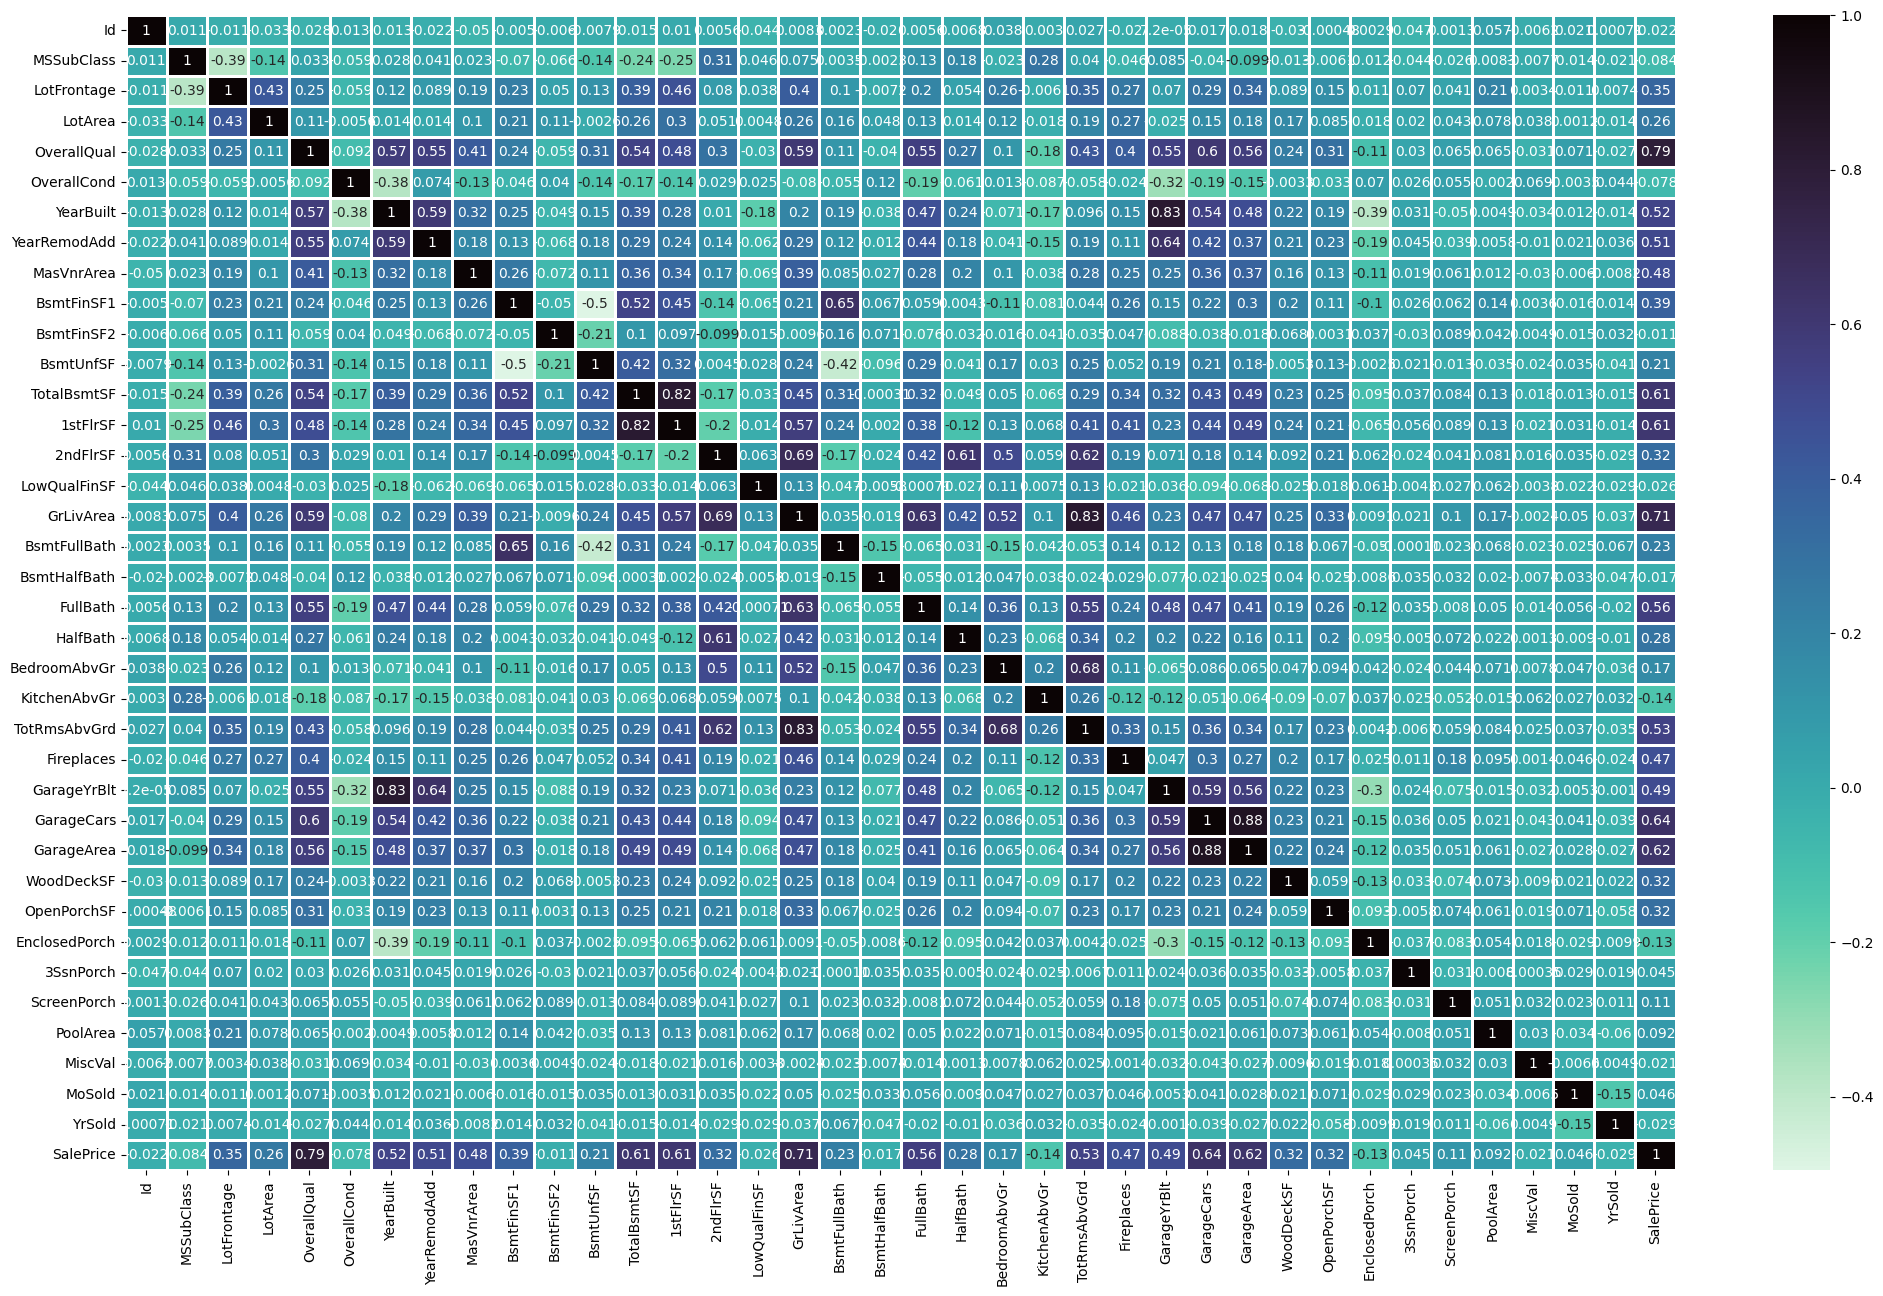

In [12]:

corr=df.select_dtypes('number').corr()

plt.figure(figsize = (25,15))

ax = sns.heatmap(corr, annot=True, linewidths=0.8,cmap='mako_r')


High correlation
    ['YearBuilt','GarageYrBlt']
    ['1stFlrSF','TotalBsmtSF']
    ['GarageCars' ,'GarageArea']
    ['GrLivArea','TotRmsAbvGrd']
    
    i will delete columns with more null values or less correlated with target

In [13]:
df.drop(columns=['GarageYrBlt','1stFlrSF','GarageArea','TotRmsAbvGrd'],inplace=True)
test.drop(columns=['GarageYrBlt','1stFlrSF','GarageArea','TotRmsAbvGrd'],inplace=True)

In [14]:
# Delete Categorical columns with lots of missing values
df.drop(columns='FireplaceQu',inplace=True)
test.drop(columns='FireplaceQu',inplace=True)
# as we need to deel with cat values

# Outliers
outliers can affect the accuracy of any model as it is affect the **varience** of the **mean** too
    so lets try


let drop the outliers of the columns that highly correlated with **Saleseprice** column

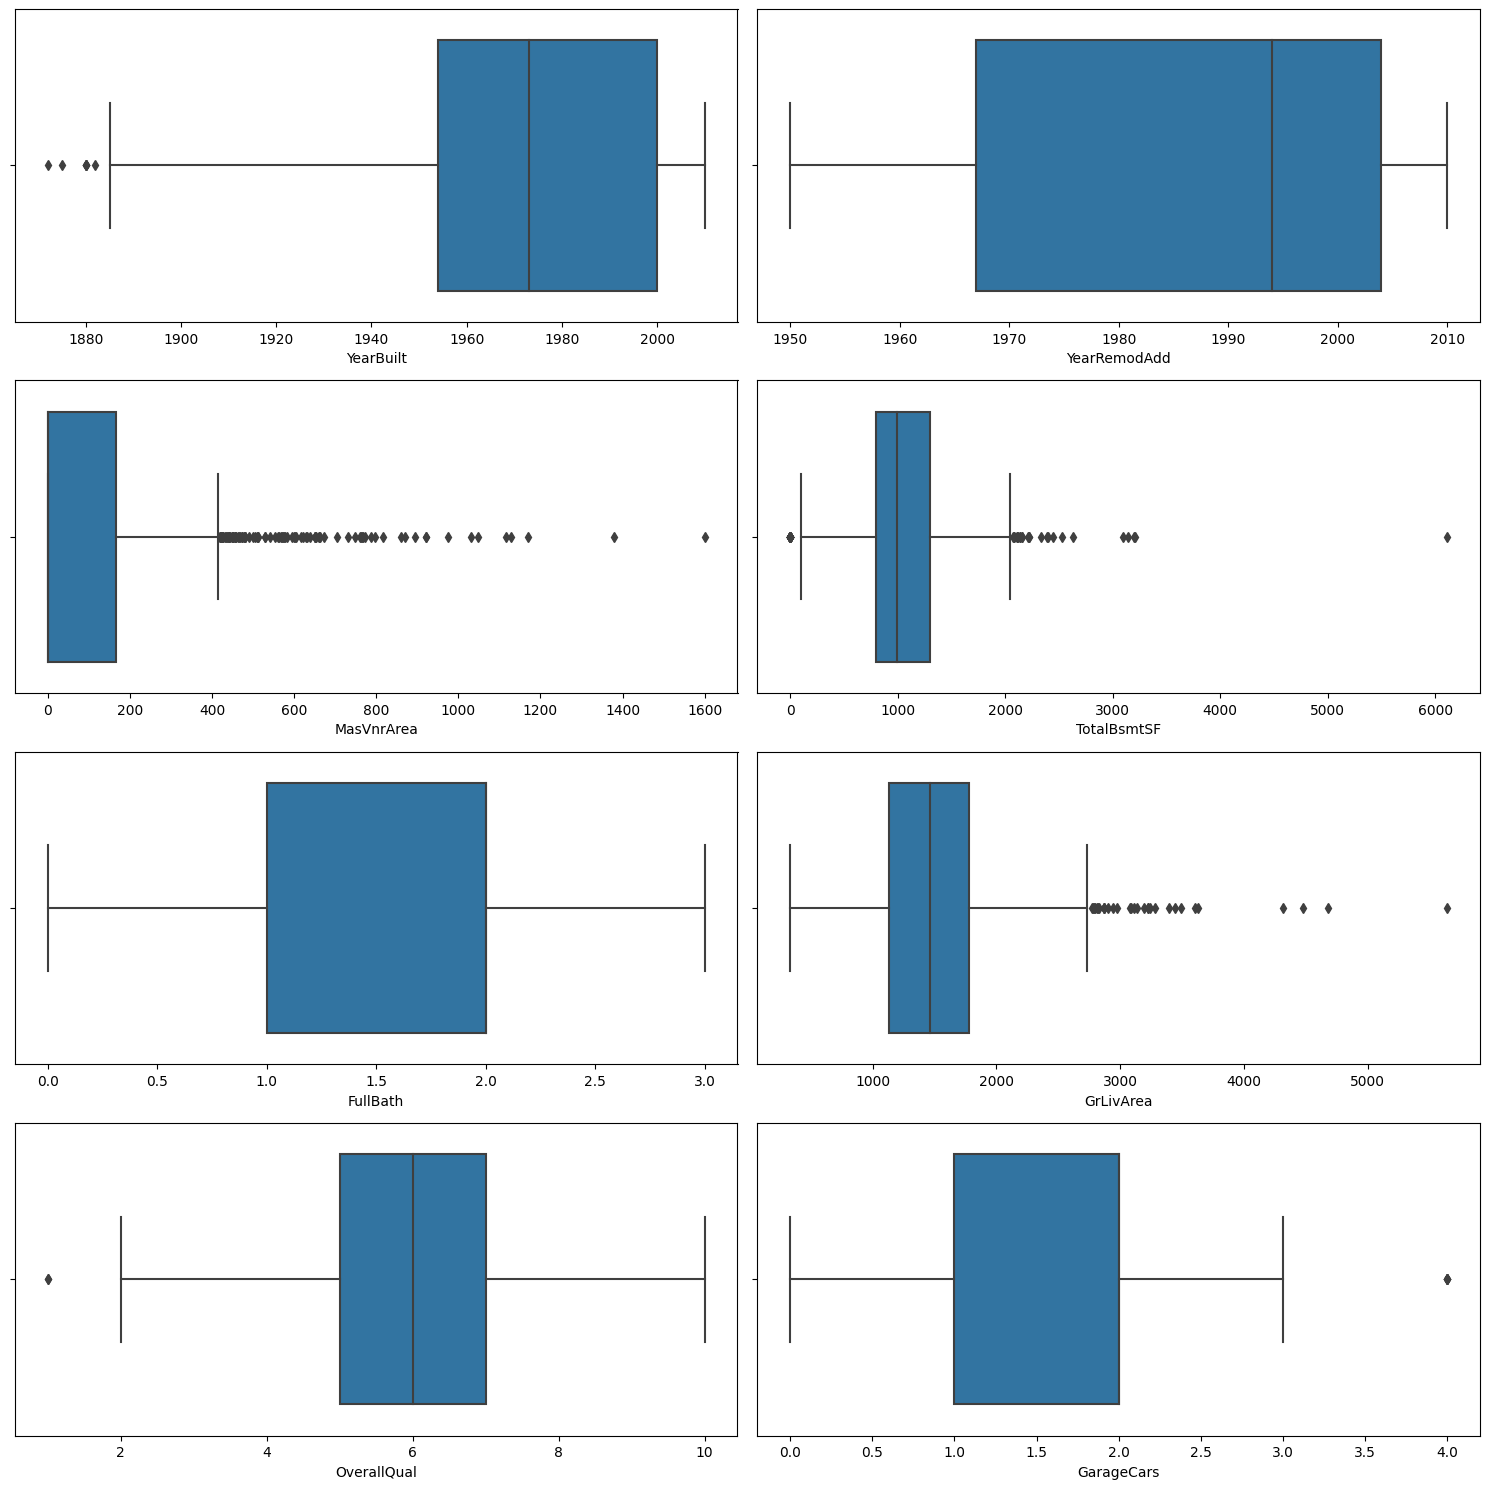

['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'FullBath', 'GrLivArea', 'OverallQual', 'GarageCars']


In [15]:
out_cols=['YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','FullBath','GrLivArea','OverallQual','GarageCars']

cum=[]
fig,axs=plt.subplots(4,2,figsize=(15,15))
axs=axs.flatten()
for i,column in enumerate(out_cols) :
    sns.boxplot(x=column,data=df,ax=axs[i])
    cum.append(column)
fig.tight_layout()
plt.show()
print(cum)

Seems that 'TotalBsmtSF','GrLivArea' have outliers lets catch 🤧🤧 them

In [16]:
df.drop(columns='Id',inplace= True)
mask1=df['TotalBsmtSF']<2050
mask2=df['TotalBsmtSF']>100
mask3=df['GrLivArea']<2800
mask4=df['GarageCars']<3.8
mask5=df['OverallQual']>1.8
DF=df[mask1&mask2 &mask3&mask4&mask5]


    Done with outliers

# Skewed Data

skewed data affect the performance of any model so lets see the **distribution** of the features and fix the skewed data

As a general rule of thumb:

    Data is symmetrical: skewness is between -0.5 and 0.5
    Data is slightly skewed: skewness is between -1 and -0.5 or 0.5 and 1
    Data is highly skewed: skewness is less than -1 or greater than 1.

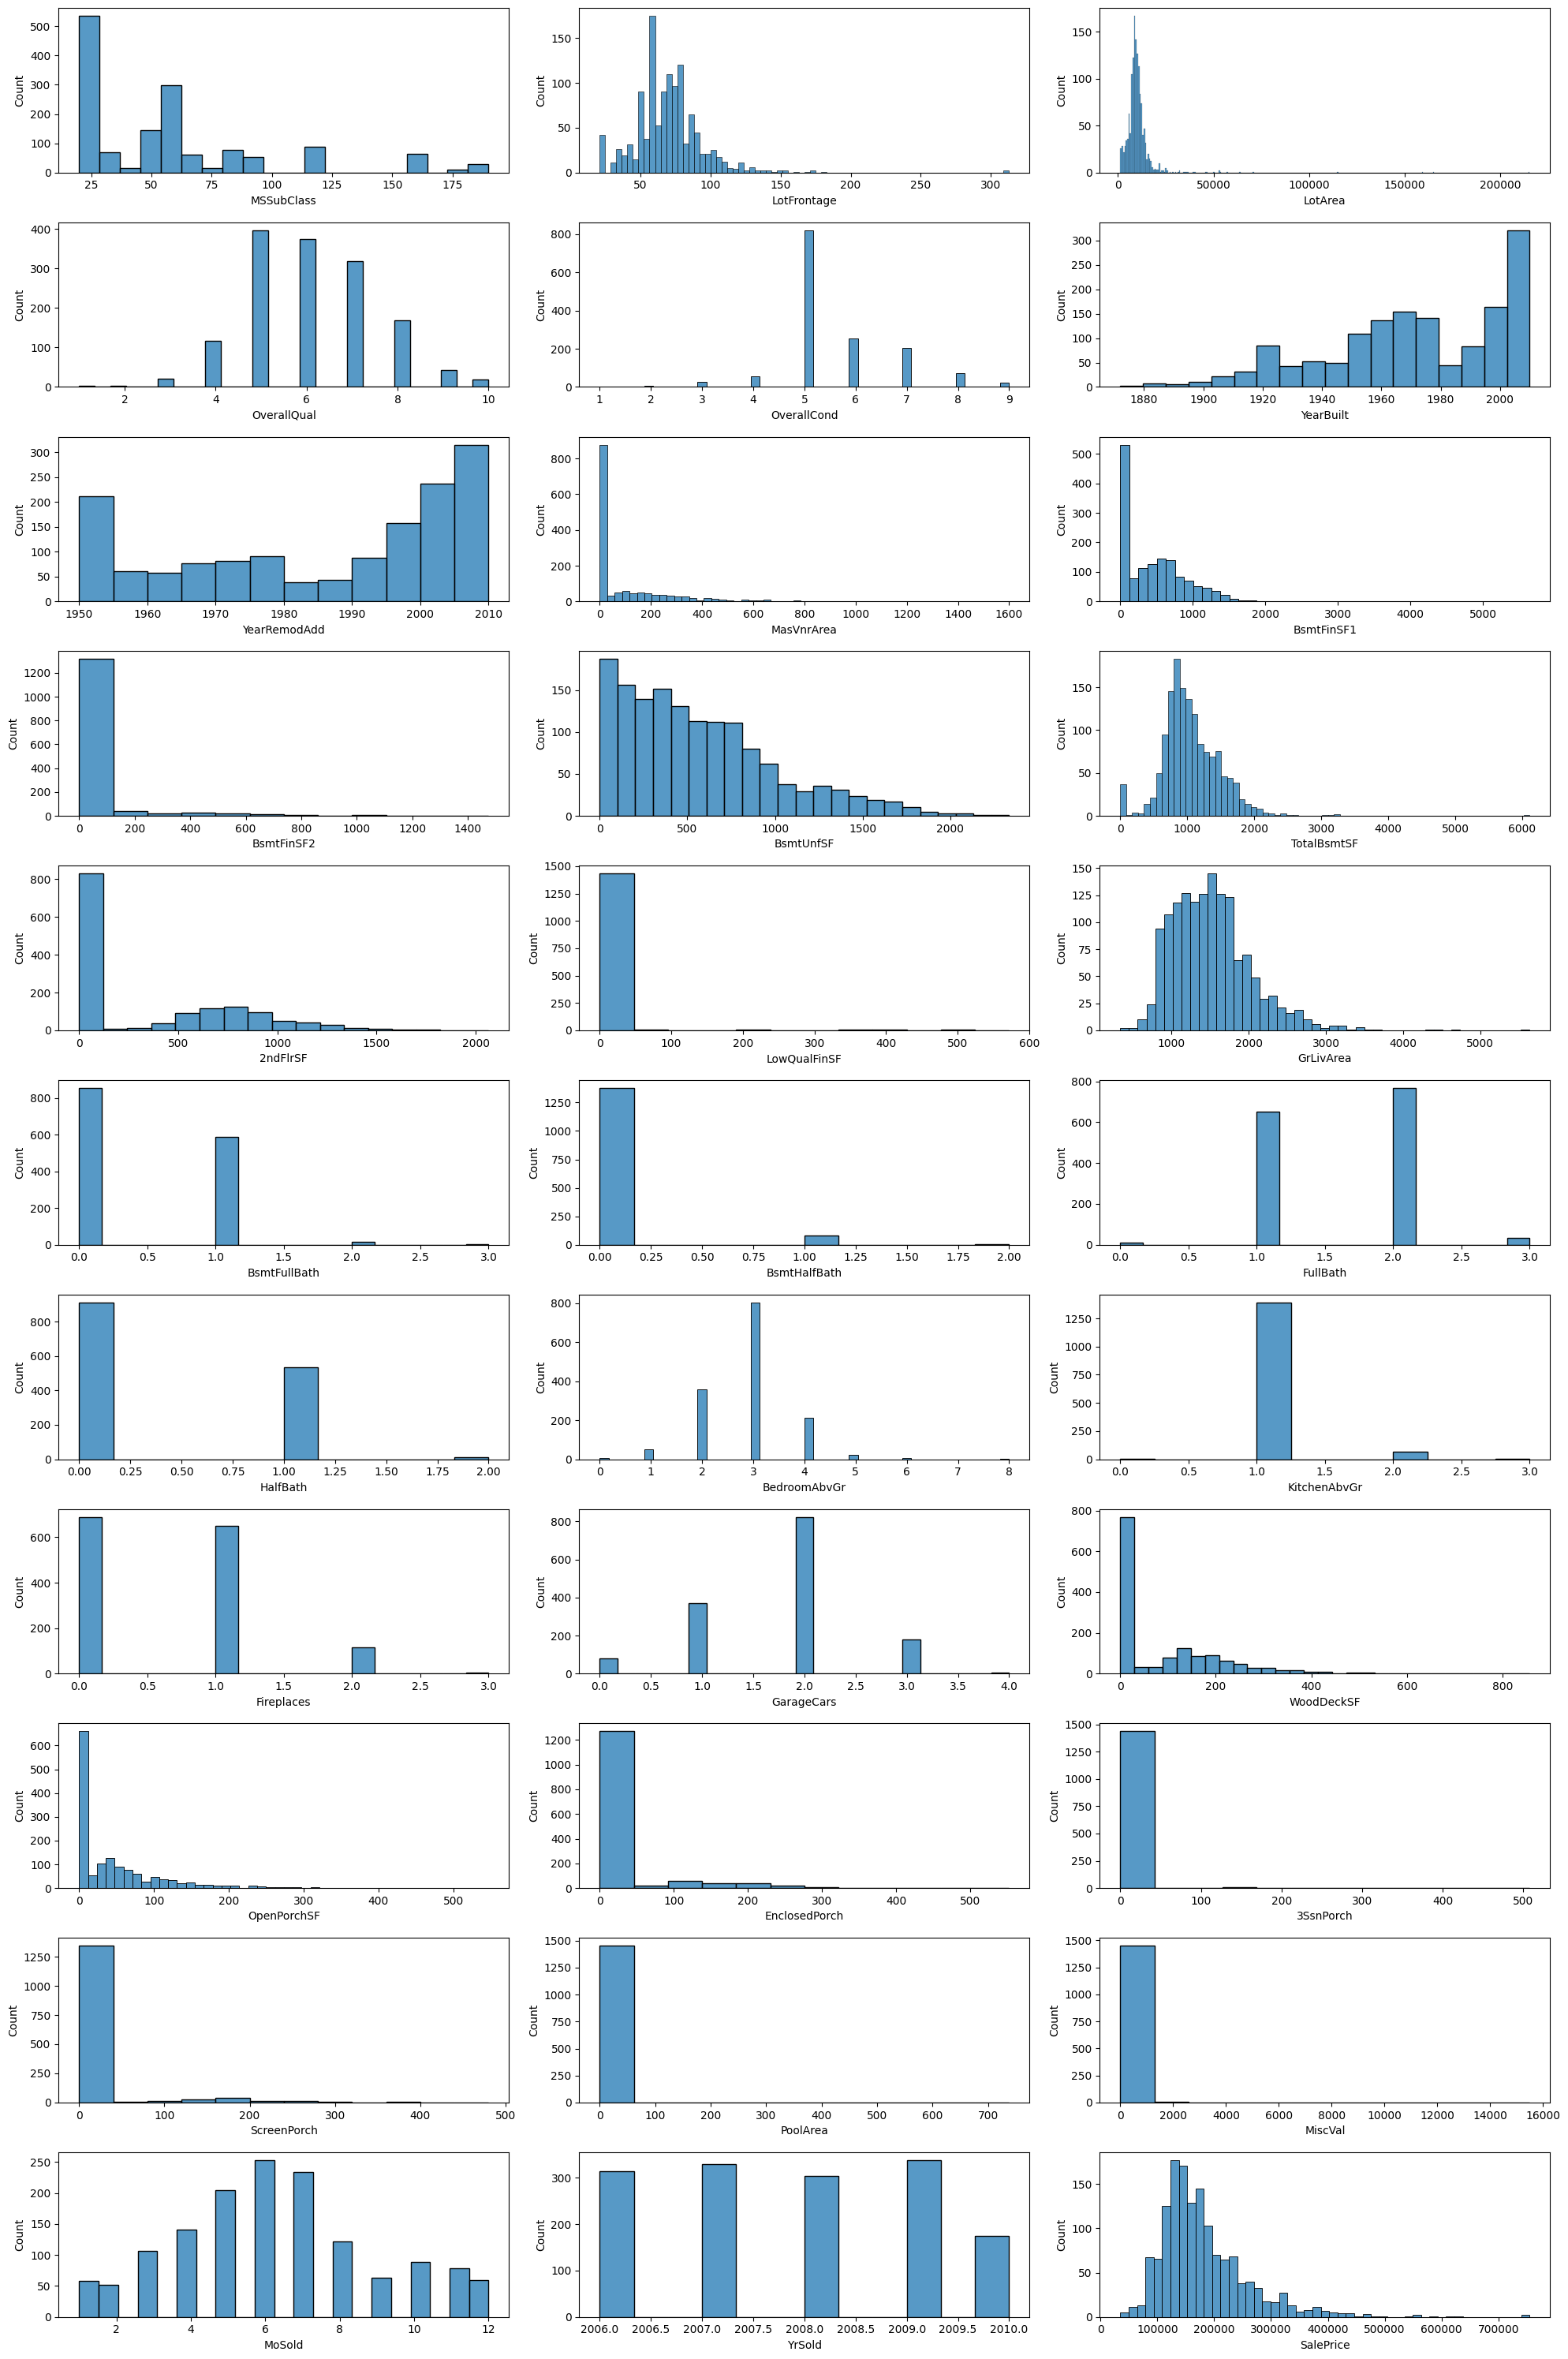

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [17]:

cum=[]
fig,axs=plt.subplots(11,3,figsize=(20,30))
axs=axs.flatten()
for i,column in enumerate(df.select_dtypes('number').columns) :
    sns.histplot(x=column,data=df,ax=axs[i])
    cum.append(column)
fig.tight_layout()
plt.show()
print(cum)

ther is lots of columns with skewed data whitch make it hard to catch them so lets try check it with **if** statement and see what will happen

In [18]:
# select columns with skew()>1 or <1

sk=[]
for i in df.drop(columns=[ 'YearBuilt','YearRemodAdd']).select_dtypes('number').columns:
    if ((df[i].skew()>1) or (df[i].skew()<1)):
        sk.append(i)
sk

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [19]:
# update values of skew data from x to log(x)
np.seterr(divide = 'ignore')
sk_=pd.DataFrame(np.select([DF[sk]==0, DF[sk] > 0, DF[sk] < 0], [0, np.log(DF[sk]), np.log(DF[sk])]),columns=sk).set_index(DF.index)
df_skew=DF.drop(columns=sk).set_index(DF.index)

df_skew=pd.concat([df_skew,sk_],axis=1)
X_train_skew=df_skew.drop(columns='SalePrice')

In [20]:
# select columns with skew()>1 or <1

sk_t=[]
for i in test.drop(columns=[ 'YearBuilt','YearRemodAdd']).select_dtypes('number').columns:
    if ((test[i].skew()>1) or (test[i].skew()<1)):
        sk_t.append(i)
sk_t=pd.DataFrame(np.select([test[sk_t]==0, test[sk_t] > 0, test[sk_t] < 0], [0, np.log(test[sk_t]), np.log(test[sk_t])]),columns=sk_t).set_index(test.index)
df_skew_t=test.drop(columns=sk_t).set_index(test.index)

df_skew_t=pd.concat([df_skew_t,sk_t],axis=1)
X_test_skew=df_skew_t.reindex(columns=X_train_skew.columns)
X_test_skew.shape

(1459, 70)

In [21]:
X_train_skew.shape

(1371, 70)

I do not apply the skewed data in the real data as i want to train model with this data and the real data (i did it with my self and it give more accurecy with new updates)
    I want to if it will do better than the real data
    if not we will continue as things is not changing
    

# ID columns
    we will need it in the last of project but not in training
    so lets store it in id_column

In [22]:
id_column=test['Id']
#df.drop(columns='Id',inplace= True)
test.drop(columns='Id',inplace= True)

# Build Model
   

## **Impute missing values**
imputing missing values for categorical features is diff from numerical features in **strategy**

so lets split the data for cat and num features and impute each one in separate imputer

In [215]:
df_final = df.drop('SalePrice',axis=1)

In [216]:
# start with Categorical Features
imp_cat = SimpleImputer(strategy="most_frequent")

X_Cat= df_final.select_dtypes('object')
X_data_cat = imp_cat.fit_transform(X_Cat)
ohe = OneHotEncoder(drop='first',sparse_output=False)

In [217]:
df_ohe = ohe.fit_transform(X_Cat)

In [218]:
# Numerical Features
imp_num = SimpleImputer()

X_num=df_final.select_dtypes('number')
X_data_num = imp_num.fit_transform(X_num)


In [219]:
type(X_data_num)

numpy.ndarray

In [220]:
# type(X_train_cat)
X_trial_Data=pd.concat([pd.DataFrame(df_ohe),pd.DataFrame(X_data_num)],axis=1)
X_trial_Data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1456,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1457,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1458,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


In [221]:
# Conatinate twice to get them pack as last version
X_train_Data=pd.concat([pd.DataFrame(df_ohe),pd.DataFrame(X_data_num)],axis=1)
X_Data=np.concatenate([df_ohe,X_data_num],axis=1)

In [222]:
X_Data.shape

(1460, 239)

###**Split**

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X_Data,df['SalePrice'],
                                                test_size=0.2)

In [224]:
type(X_train)

numpy.ndarray

In [225]:
X_train.shape

(1168, 239)

In [226]:
X_test.shape

(292, 239)

# **Model Implemetation**

In [227]:
from sklearn.metrics import mean_squared_error,r2_score

# Fitting a **Random Forest** **Model** and Hyperparameter tuning

In [228]:
from sklearn.ensemble import RandomForestRegressor
clf_random_tree = RandomForestRegressor(max_depth=25, random_state=0,n_estimators=1000)

In [229]:
clf_random_tree.fit(X_train,y_train)

random_pred = clf_random_tree.predict(X_test)

print("Accuracy of Random Forest Model --> ", clf_random_tree.score(X_test, y_test)*100)


Accuracy of Random Forest Model -->  84.76555086264909


Assuming it's sci-kit learn in python then model.score automates the prediction of your data using X_test and compares it with Y_test and by default uses the R-squared metric to so (hence don't need to manually derive y_pred).

In [230]:
mean_squared_error(random_pred,y_test,squared=False)
r2_score(random_pred,y_test)

0.8224024043841541

In [231]:
y_train

241     110500
566     325000
1398    138000
715     165000
1393    163000
         ...  
898     611657
1096    127000
410      60000
355     177500
264      73000
Name: SalePrice, Length: 1168, dtype: int64

In [232]:
X_Model_train.shape

(1168, 226)

# Fitting a **Decision Tree Model**

In [233]:
from sklearn import tree
clf_tree = tree.DecisionTreeRegressor()

In [234]:
clf_tree.fit(X_train,y_train)
decision_pred = clf_tree.predict(X_test)
accuracy_score(decision_pred,y_test)

0.003424657534246575

In [235]:
print("Accuracy of Decision Tree --> ", clf_tree.score(X_test, y_test)*100)

Accuracy of Decision Tree -->  67.87863998002284


# Fitting a **Support Vector Machine Model**

In [236]:
from sklearn import svm
from sklearn.metrics import mean_squared_error,r2_score
clf = svm.SVC(decision_function_shape='ovo')

In [237]:
clf.fit(X_train,y_train)
svm_pred = clf.predict(X_test)
r2_score(svm_pred,y_test)

-28.929062938781158

In [238]:
print("Accuracy of SVM --> ", clf.score(X_test, y_test)*100)

Accuracy of SVM -->  1.0273972602739725


Fitting a Random Forest Model and Hyperparameter tuning

# **KNN Algorithm**

In [239]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsRegressor()

In [240]:
error_rate = []
[True, False, ...  ]
# Will take some time
for i in range(1,40):

    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

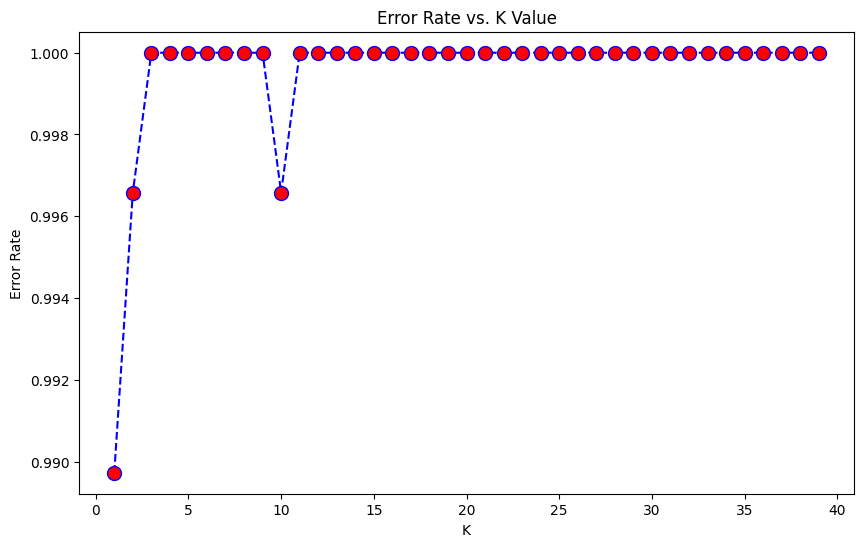

In [241]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [242]:
# KNN neighbour = 3
knn3 = KNeighborsRegressor(n_neighbors=3)

knn3.fit(X_train,y_train)
knn_pred = knn.predict(X_test)


In [243]:
print("Accuracy of KNN --> ", knn3.score(X_test, y_test)*100)

Accuracy of KNN -->  63.84899443481482


# **Naive Based Classification**

In [244]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

Mb = MultinomialNB()
Bb = BernoulliNB()
Gb = GaussianNB()

In [245]:
Mb.fit(X_train,y_train)
y_pred = Mb.predict(X_test)
print("Accuracy on MultinomialNB --> ", Mb.score(X_test, y_test)*100)

Accuracy on MultinomialNB -->  0.0


In [246]:
Bb.fit(X_train,y_train)
bb_pred2 = Bb.predict(X_test)
print("Accuracy on BernoulliNB --> ", Bb.score(X_test, y_test)*100)

Accuracy on BernoulliNB -->  1.0273972602739725


In [247]:
Gb.fit(X_train,y_train)
y_pred3 = Gb.predict(X_test)
print("Accuracy on GaussianNB --> ", Gb.score(X_test, y_test)*100)

Accuracy on GaussianNB -->  0.684931506849315


# **Boosting**

In [248]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingRegressor
clf_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [249]:
clf_boosting.fit(X_train,y_train)
boosting_pred = clf_boosting.predict(X_test)

In [250]:
print("Accuracy on Gradient Boosting--> ", clf_boosting.score(X_test, y_test)*100)

Accuracy on Gradient Boosting-->  86.05929266983459


#**Reviews**

In [251]:
from sklearn.metrics import mean_squared_error,r2_score
print(f"Gradient Boosting MSE: {r2_score(y_test, boosting_pred)}")
print(f"Random forest MSE: {r2_score(y_test, random_pred)}")
print(f"Decision Tree MSE: {r2_score(y_test, decision_pred)}")
print(f"Support vector machine MSE: {r2_score(y_test, svm_pred)}")
print(f"Naive based BernoulliNB MSE: {r2_score(y_test, bb_pred2)}")
print(f"KNN Neigh=1 MSE: {r2_score(y_test, knn_pred)}")

Gradient Boosting MSE: 0.8605929266983459
Random forest MSE: 0.847655508626491
Decision Tree MSE: 0.6787863998002284
Support vector machine MSE: -0.14821314506945238
Naive based BernoulliNB MSE: 0.27101823005785286
KNN Neigh=1 MSE: 0.5657967575293379


In [252]:
import math

mse_values = [0.8640396610218306, 0.8705751147837917, 0.8118592767468824, -0.18955898672630567, 0.2003347520496762, 0.6470277623092952]

best_r2_score = -np.inf
best_mse = np.inf

for mse in mse_values:
    r2_score = 1 - (mse / np.var(y_test))

    if r2_score > best_r2_score:
        best_r2_score = r2_score
        best_mse = mse

print(f"Best R2 score: {best_r2_score:.3f} (corresponding to MSE: {best_mse:.3f})")



Best R2 score: 1.000 (corresponding to MSE: -0.190)


# Submission